# Lecture 3

## Exercise 3.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

## Implementation

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 

### Direct Sampling

- **Number of Blocks:** 1000
- **Steps per Block:** 100
- **Total Steps:** 100,000

Direct sampling provides a faster and simpler solution due to fewer computations. However, it does not allow tracking the evolution of the price path.

In [34]:
p_avg = np.loadtxt('OUTPUT/p_avg_dir.txt')
c_avg = np.loadtxt('OUTPUT/c_avg_dir.txt')
p_err = np.loadtxt('OUTPUT/p_err_dir.txt')
c_err = np.loadtxt('OUTPUT/c_err_dir.txt')

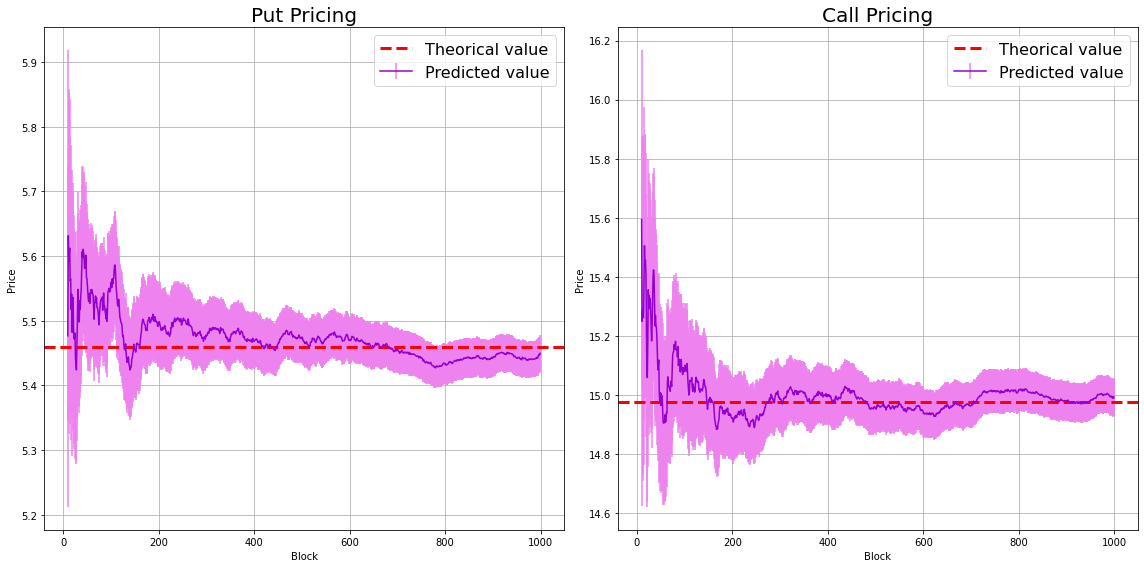

In [35]:
k = 10 # This excludes the first k values from the plot
x = np.arange(k, len(p_avg))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.errorbar(x, p_avg[k:], yerr=p_err[k:], fmt='-', label='Predicted value', color='darkviolet', ecolor='violet')
ax1.axhline(y=5.4595325819072364, color='r', linestyle='--', label='Theorical value', linewidth=3)
ax1.set_xlabel('Block')
ax1.set_ylabel('Price')
ax1.set_title('Put Pricing', fontsize=20.0)
ax1.grid()
ax1.legend(fontsize=16.0)

ax2.errorbar(x, c_avg[k:], yerr=c_err[k:], fmt='-', label='Predicted value', color='darkviolet', ecolor='violet')
ax2.axhline(y=14.975790778311286, color='r', linestyle='--', label='Theorical value', linewidth=3)
ax2.set_xlabel('Block')
ax2.set_ylabel('Price')
ax2.set_title('Call Pricing', fontsize=20.0)
ax2.grid()
ax2.legend(fontsize=16.0)

plt.tight_layout()

plt.show()

### Discretized Sampling

- **Number of Blocks:** 1000
- **Steps per Block:** 100
- **Total Steps:** 100,000
- **Increment:** 0.01

In [36]:
p_avg = np.loadtxt('OUTPUT/p_avg_disc.txt')
c_avg = np.loadtxt('OUTPUT/c_avg_disc.txt')
p_err = np.loadtxt('OUTPUT/p_err_disc.txt')
c_err = np.loadtxt('OUTPUT/c_err_disc.txt')

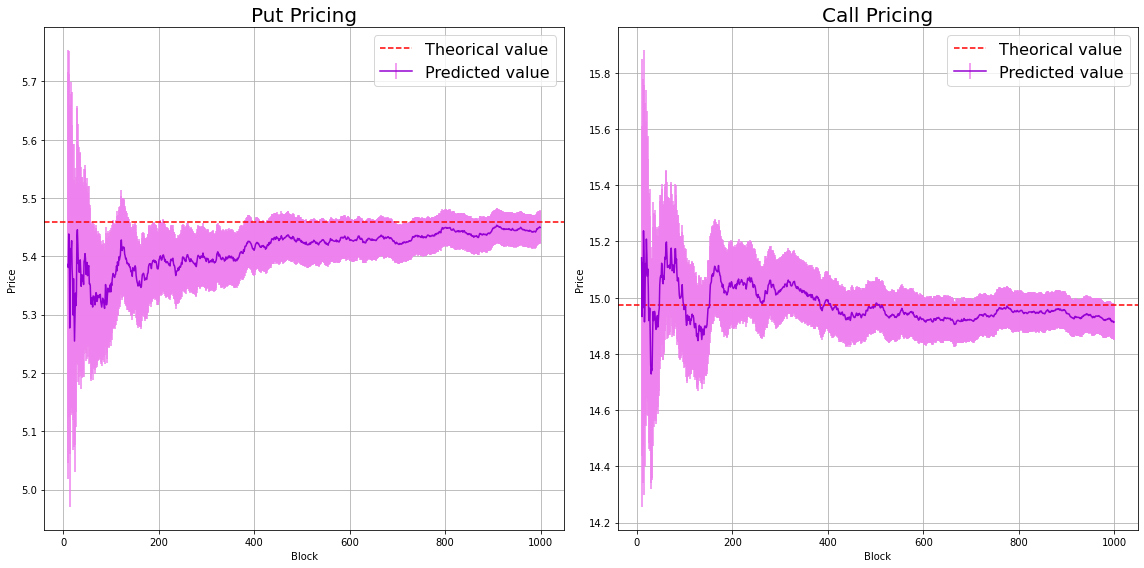

In [37]:
k = 10 # This excludes the first k values from the plot
x = np.arange(k, len(p_avg))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.errorbar(x, p_avg[k:], yerr=p_err[k:], fmt='-', label='Predicted value', color='darkviolet', ecolor='violet')
ax1.axhline(y=5.4595325819072364, color='r', linestyle='--', label='Theorical value')
ax1.set_xlabel('Block')
ax1.set_ylabel('Price')
ax1.set_title('Put Pricing', fontsize=20.0)
ax1.grid()
ax1.legend(fontsize=16.0)

ax2.errorbar(x, c_avg[k:], yerr=c_err[k:], fmt='-', label='Predicted value', color='darkviolet', ecolor='violet')
ax2.axhline(y=14.975790778311286, color='r', linestyle='--', label='Theorical value')
ax2.set_xlabel('Block')
ax2.set_ylabel('Price')
ax2.set_title('Call Pricing', fontsize=20.0)
ax2.grid()
ax2.legend(fontsize=16.0)

plt.tight_layout()

plt.show()